In [1]:
from IPython.display import display, HTML
from datetime import datetime

import json as json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("raw_data.csv")
df = df.drop(columns=["Sorszám", "Alapbetegségek"])
df.drop(df.index[0:215],0,inplace=True)
df = df.reindex(index=df.index[::-1])
df.reset_index(drop=True, inplace=True)
df.tail(5)

C:\Users\bornalid\AppData\Local\Temp/ipykernel_17988/2552302721.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.index[0:215],0,inplace=True)


,Nem,Kor
32166,Nõ,89
32167,Nõ,78
32168,Férfi,70
32169,Nõ,85
32170,Férfi,70


In [3]:
read_file = pd.DataFrame(pd.read_excel("dates.xlsx"))
read_file.to_csv ("dates.csv",
                  index = None,
                  header=True)
df1 = pd.read_csv("dates.csv")
df1 = pd.read_csv("dates.csv", usecols=['Dátum', 'Elhunytak', 'New Deaths'])
df1.drop(df1.index[0:12],0,inplace=True)
df1['Elhunytak'] = df1['Elhunytak'].fillna(0)
df1['New Deaths'] = df1['New Deaths'].fillna(0)
df1.reset_index(drop=True, inplace=True)
print(df1.head())
len(df1)

        Dátum  Elhunytak  New Deaths
0  2020-03-16        1.0         1.0
1  2020-03-17        1.0         0.0
2  2020-03-18        1.0         0.0
3  2020-03-19        1.0         0.0
4  2020-03-20        4.0         3.0


C:\Users\bornalid\AppData\Local\Temp/ipykernel_17988/292601570.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(df1.index[0:12],0,inplace=True)


610

In [4]:
repeat = df1["New Deaths"]
data = pd.DataFrame(np.repeat(df1.values, repeat,axis=0), columns= df1.columns)
data.head()

,Dátum,Elhunytak,New Deaths
0,2020-03-16,1.0,1.0
1,2020-03-20,4.0,3.0
2,2020-03-20,4.0,3.0
3,2020-03-20,4.0,3.0
4,2020-03-22,6.0,2.0


In [5]:
new_data = pd.merge(data, df, left_index=True, right_index=True)
new_data = new_data.drop(columns=['Elhunytak', 'New Deaths'])
new_data["Dátum"]=pd.to_datetime(new_data["Dátum"])
new_data.set_index("Dátum", inplace=True)
print(new_data.head())
len(new_data)

              Nem  Kor
Dátum                 
2020-03-16     Nő   76
2020-03-20     Nő   65
2020-03-20  Férfi   74
2020-03-20  Férfi   79
2020-03-22  Férfi   68


32171

In [6]:
df1["Dátum"]=pd.to_datetime(df1["Dátum"])
df1.set_index("Dátum", inplace=True)
data_with_dates=pd.merge(df1,new_data, how='inner', left_index=True, right_index=True)
data_with_dates.to_csv("data_with_dates.csv")
data_with_dates.reset_index(level=0, inplace=True)

In [7]:
data_with_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32171 entries, 0 to 32170
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dátum       32171 non-null  datetime64[ns]
 1   Elhunytak   32171 non-null  float64       
 2   New Deaths  32171 non-null  float64       
 3   Nem         32171 non-null  object        
 4   Kor         32171 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [8]:
bins= pd.DataFrame(pd.cut(x=data_with_dates['Kor'], bins=[0, 9, 19, 29, 39, 49,59,69, 79, 89,99, 109]))
bins.rename(columns={'Kor' :'Age'},inplace=True)
bins

,Age
0,"(69, 79]"
1,"(59, 69]"
2,"(69, 79]"
3,"(69, 79]"
4,"(59, 69]"
...,...
32166,"(79, 89]"
32167,"(69, 79]"
32168,"(69, 79]"
32169,"(79, 89]"


In [9]:
data_with_dates=pd.concat((data_with_dates,bins), axis = 1)
data_with_dates.drop(columns=["Elhunytak","New Deaths"], inplace = True)
data_with_dates.head(20)

,Dátum,Nem,Kor,Age
0,2020-03-16,Nő,76,"(69, 79]"
1,2020-03-20,Nő,65,"(59, 69]"
2,2020-03-20,Férfi,74,"(69, 79]"
3,2020-03-20,Férfi,79,"(69, 79]"
4,2020-03-22,Férfi,68,"(59, 69]"
5,2020-03-22,Nő,41,"(39, 49]"
6,2020-03-23,Férfi,38,"(29, 39]"
7,2020-03-23,Férfi,53,"(49, 59]"
8,2020-03-24,Nő,90,"(89, 99]"
9,2020-03-25,Férfi,75,"(69, 79]"


In [10]:
rep = pd.DataFrame(data_with_dates.groupby(pd.Grouper(freq='W', key='Dátum'))['Nem'].count())
rep.reset_index(inplace=True)
rep1 = rep["Nem"]
mydata = pd.DataFrame(np.repeat(rep.values, rep1,axis=0), columns= rep.columns)
mydata["Date"] = mydata["Dátum"] 
mydata["Count"] = mydata["Nem"]
mydata.drop(columns=["Dátum", "Nem"], inplace = True)
mydata.head()

,Date,Count
0,2020-03-22,6
1,2020-03-22,6
2,2020-03-22,6
3,2020-03-22,6
4,2020-03-22,6


In [11]:
date_age=pd.merge(mydata, data_with_dates, how='inner', left_index=True, right_index=True)
date_age.head()
date_age.drop(columns=["Dátum"], inplace = True)
date_age["Date"] = date_age["Date"].dt.date
date_age.drop(columns=["Count", "Nem", "Kor" ], inplace = True)

date_age.head(10)

,Date,Age
0,2020-03-22,"(69, 79]"
1,2020-03-22,"(59, 69]"
2,2020-03-22,"(69, 79]"
3,2020-03-22,"(69, 79]"
4,2020-03-22,"(59, 69]"
5,2020-03-22,"(39, 49]"
6,2020-03-29,"(29, 39]"
7,2020-03-29,"(49, 59]"
8,2020-03-29,"(89, 99]"
9,2020-03-29,"(69, 79]"


In [12]:
aggregated_data = date_age.groupby( list(date_age))[['Date']].count()
#aggregated_data.head(50)
aggregated_data = aggregated_data.unstack(level = 0)
aggregated_data.to_csv("aggregated_data.csv")
aggregated_data = aggregated_data.reindex(index=aggregated_data.index[::-1])
#data_with_dates(['Date', 'Age']).count()
#means = data_with_dates.join(data_with_dates).groupby( list(data_with_dates) )
#means = means.unstack(level = 0) 
aggregated_data.head()

Date                                                         \
Date      2020-03-22 2020-03-29 2020-04-05 2020-04-12 2020-04-19 2020-04-26   
Age                                                                           
(99, 109]          0          0          0          0          0          0   
(89, 99]           0          1          3          8         12         11   
(79, 89]           0          2         10         18         35         38   
(69, 79]           3          2          4         23         26         21   
(59, 69]           2          0          3         12         13         10   

                                                       ...             \
Date      2020-05-03 2020-05-10 2020-05-17 2020-05-24  ... 2021-09-19   
Age                                                    ...              
(99, 109]          0          0          0          0  ...          0   
(89, 99]           5         10          4          2  ...          4   
(79, 89]          19         27         14         10  ...         15   
(69, 79]          26         24         11         11  ...          7   
(59, 69]          12          9          7          9  ...          4   

                                                                             \
Date      2021-09-26 2021-10-03 2021-10-10 2021-10-17 2021-10-24 2021-10-31   
Age                                                                           
(99, 109]          0          0          0          0          0          1   
(89, 99]           2          7          5          8          5         25   
(79, 89]          10         14         16         14         40         60   
(69, 79]           5         11         22         23         43         68   
(59, 69]           8          9         20         15         26         50   

                                            
Date      2021-11-07 2021-11-14 2021-11-21  
Age                                         
(99, 109]          2          2          0  
(89, 99]          38         45         16  
(79, 89]         114        195         70  
(69, 79]         136        196         96  
(59, 69]          98        157         61  

[5 rows x 87 columns]

In [13]:
weekly=aggregated_data.columns

In [14]:
rows=aggregated_data.index
rows=rows.categories[:10]
rows=rows[::-1]

In [15]:
table=aggregated_data.to_numpy()
new_table=table[1:,:]

<AxesSubplot:xlabel='None-Date', ylabel='Age'>

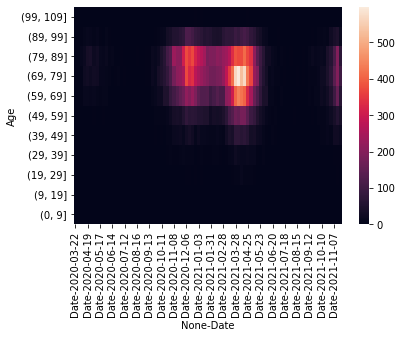

In [16]:
ax = sns.heatmap(aggregated_data)
ax

In [17]:
file = open("populacio.json")
population = json.load(file)

dict_to_list = list(population.items())
aggregated_data_ratio= pd.DataFrame(dict_to_list,columns=['Age','popln'])
aggregated_data_ratio["Age"]=aggregated_data_ratio["Age"].astype(int)
aggregated_data_ratio.head()


,Age,popln
0,0,89687
1,1,89995
2,2,90532
3,3,91234
4,4,91993


In [18]:
aggregated_data_ratio['Age']= pd.DataFrame(pd.cut(x=aggregated_data_ratio['Age'], bins=[-0.1, 9, 19, 29, 39, 49,59,69, 79, 89,99, 109]))

#aggregated_data_ratio.groupby( list(aggregated_data_ratio))[['popln']].count()
#aggregated_data_ratio.groupby(['Age']).['popln'].agg('sum')
aggregated=aggregated_data_ratio.groupby(['Age'])['popln'].agg('sum')

In [19]:
table1=aggregated.to_numpy()
table1=table1[::-1]
table1=table1.reshape(len(table1), 1)

In [20]:
table2=new_table/table1

In [21]:
aggregated_data_ratio1=pd.DataFrame(table2,columns=weekly, index=rows)
aggregated_data_ratio1

Date                                                 \
Date        2020-03-22    2020-03-29 2020-04-05 2020-04-12 2020-04-19   
(89, 99]  0.000000e+00  1.454651e-05   0.000044   0.000116   0.000175   
(79, 89]  0.000000e+00  5.198046e-06   0.000026   0.000047   0.000091   
(69, 79]  3.461981e-06  2.307987e-06   0.000005   0.000027   0.000030   
(59, 69]  1.545466e-06  0.000000e+00   0.000002   0.000009   0.000010   
(49, 59]  0.000000e+00  8.279215e-07   0.000002   0.000002   0.000002   
(39, 49]  6.498596e-07  0.000000e+00   0.000000   0.000001   0.000001   
(29, 39]  0.000000e+00  8.301084e-07   0.000000   0.000000   0.000000   
(19, 29]  0.000000e+00  0.000000e+00   0.000000   0.000000   0.000000   
(9, 19]   0.000000e+00  0.000000e+00   0.000000   0.000000   0.000000   
(0, 9]    0.000000e+00  0.000000e+00   0.000000   0.000000   0.000000   

                                                                          ...  \
Date        2020-04-26    2020-05-03    2020-05-10 2020-05-17 2020-05-24  ...   
(89, 99]  1.600116e-04  7.273256e-05  1.454651e-04   0.000058   0.000029  ...   
(79, 89]  9.876287e-05  4.938143e-05  7.017361e-05   0.000036   0.000026  ...   
(69, 79]  2.423386e-05  3.000383e-05  2.769584e-05   0.000013   0.000013  ...   
(59, 69]  7.727330e-06  9.272796e-06  6.954597e-06   0.000005   0.000007  ...   
(49, 59]  8.279215e-07  3.311686e-06  1.655843e-06   0.000002   0.000002  ...   
(39, 49]  6.498596e-07  6.498596e-07  6.498596e-07   0.000000   0.000000  ...   
(29, 39]  8.301084e-07  8.301084e-07  0.000000e+00   0.000000   0.000000  ...   
(19, 29]  0.000000e+00  0.000000e+00  0.000000e+00   0.000000   0.000000  ...   
(9, 19]   0.000000e+00  0.000000e+00  0.000000e+00   0.000000   0.000000  ...   
(0, 9]    0.000000e+00  0.000000e+00  0.000000e+00   0.000000   0.000000  ...   

                                                                       \
Date     2021-09-19    2021-09-26 2021-10-03    2021-10-10 2021-10-17   
(89, 99]   0.000058  2.909302e-05   0.000102  7.273256e-05   0.000116   
(79, 89]   0.000039  2.599023e-05   0.000036  4.158436e-05   0.000036   
(69, 79]   0.000008  5.769968e-06   0.000013  2.538786e-05   0.000027   
(59, 69]   0.000003  6.181864e-06   0.000007  1.545466e-05   0.000012   
(49, 59]   0.000002  1.655843e-06   0.000004  4.139607e-06   0.000006   
(39, 49]   0.000001  6.498596e-07   0.000001  3.249298e-06   0.000005   
(29, 39]   0.000000  0.000000e+00   0.000000  1.660217e-06   0.000002   
(19, 29]   0.000000  0.000000e+00   0.000000  9.016425e-07   0.000000   
(9, 19]    0.000001  0.000000e+00   0.000000  0.000000e+00   0.000000   
(0, 9]     0.000000  0.000000e+00   0.000000  0.000000e+00   0.000000   

                                                                       
Date        2021-10-24    2021-10-31 2021-11-07 2021-11-14 2021-11-21  
(89, 99]  7.273256e-05  3.636628e-04   0.000553   0.000655   0.000233  
(79, 89]  1.039609e-04  1.559414e-04   0.000296   0.000507   0.000182  
(69, 79]  4.962172e-05  7.847156e-05   0.000157   0.000226   0.000111  
(59, 69]  2.009106e-05  3.863665e-05   0.000076   0.000121   0.000047  
(49, 59]  1.076298e-05  1.904219e-05   0.000031   0.000046   0.000031  
(39, 49]  7.148455e-06  4.549017e-06   0.000016   0.000016   0.000011  
(29, 39]  8.301084e-07  1.660217e-06   0.000003   0.000003   0.000003  
(19, 29]  9.016425e-07  9.016425e-07   0.000002   0.000003   0.000002  
(9, 19]   1.032501e-06  0.000000e+00   0.000000   0.000000   0.000000  
(0, 9]    0.000000e+00  0.000000e+00   0.000000   0.000001   0.000001  

[10 rows x 87 columns]

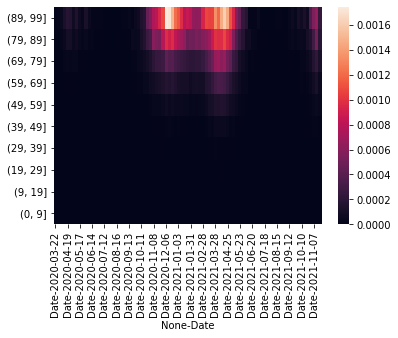

In [22]:
axx = sns.heatmap(aggregated_data_ratio1)

In [23]:
age_data = data_with_dates.drop(columns=["Dátum","Age"])
age_data ["Nem"].replace({"férfi": "Férfi", "nõ": "Nõ", "Nő": "Nõ"}, inplace=True)
age_data.reset_index(drop=True, inplace=True)
age_data.head()

,Nem,Kor
0,Nõ,76
1,Nõ,65
2,Férfi,74
3,Férfi,79
4,Férfi,68


In [24]:
age_data = age_data.groupby( list(age_data))[['Nem']].count()
age_data = age_data.unstack(level = 0)
#pd.read_csv('age_data',skiprows=1)
age_data.to_csv("age_data.csv")

#new_header = age_data.iloc[0] #grab the first row for the header
#age_data = age_data[1:] #take the data less the header row
#age_data.columns = new_header
#age_data=age_data.iloc[0] 
#age_data.drop(label, inplace=True)

#age_data.drop(age_data.index[:1], inplace=True)

#age_data.drop(columns=["Nem"], inplace = True)

#age_data = age_data[2:, :]
age_data.head(20)

Nem      
Nem Férfi    Nõ
Kor            
0     1.0   1.0
1     NaN   2.0
4     NaN   1.0
14    NaN   1.0
16    NaN   2.0
18    1.0   1.0
19    4.0   NaN
20    4.0   NaN
21    2.0   3.0
22    2.0   1.0
23    4.0   1.0
24    5.0   5.0
25    7.0   NaN
26   11.0  10.0
27    6.0   5.0
28    9.0   5.0
29   10.0  12.0
30    8.0   4.0
31   13.0   4.0
32   11.0   6.0

In [25]:
bar_plot = sns.barplot(x=age_data ["Férfi"], y=age_data ["Kor"], data=age_data, order=age_data ["Kor"], lw=0)
bar_plot = sns.barplot(x= age_data ["Nõ"], y=age_data ["Kor"], data=age_data, order=age_data ["Kor"], lw=0)

KeyError: 'Férfi'